# LSTM for Shakespare Style Text Generation

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2021-05-17 11:56:58--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.240, 172.217.8.16, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-05-17 11:56:58 (95.8 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
# Creating a model with two LSTM layers and one dropout function
model = Sequential()
Layer1 = model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
Layer2 = model.add(Bidirectional(LSTM(150, return_sequences=True))) # return_sequences=True is there is another LSTM layer
Layer3 = model.add(Dropout(.03))
Layer4 = model.add(LSTM(100))
Layer5 = model.add(Dense(1605, 
    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)))
         
Layer6 = model.add(Dense(total_words, activation = 'softmax'))

          
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [ ]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 41s 13ms/step - loss: 7.0550 - accuracy: 0.0195
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.4350 - accuracy: 0.0301
Epoch 3/100
484/484 [==============================] - 6s 12ms/step - loss: 6.2226 - accuracy: 0.0381
Epoch 4/100
484/484 [==============================] - 6s 12ms/step - loss: 5.9513 - accuracy: 0.0545
Epoch 5/100
484/484 [==============================] - 5s 11ms/step - loss: 5.6782 - accuracy: 0.0638
Epoch 6/100
484/484 [==============================] - 5s 11ms/step - loss: 5.3490 - accuracy: 0.0772
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 5.0243 - accuracy: 0.0987
Epoch 8/100
484/484 [==============================] - 5s 11ms/step - loss: 4.7041 - accuracy: 0.1187
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 4.3184 - accuracy: 0.1611
Epoch 10/100
484/484 [==============================] - 5s 11ms/step - loss: 3.92

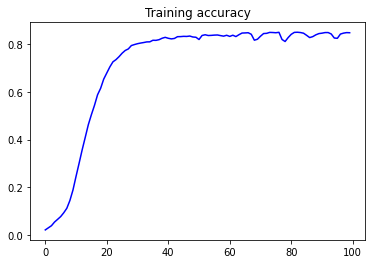

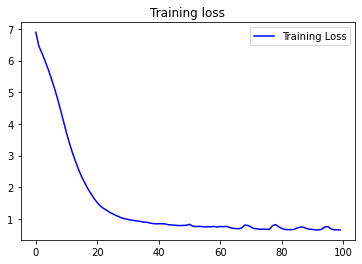

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

Using the model to generate 100 words of Shakespearean text.

In [ ]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Help me Obi Wan Kenobi, you're my only hope will give me bow me eyes and 'will ' speed bright of our old resent evil light in down truth of whose dearth greater prove and lease and time ' may leave me read thine eye ' be thing a loss can be my mind being groan doth steal thee all my poverty my tune offence's cross light faces ' growing of souls spent evil made so sun as old sun be a dream as place an hand with beauty presage doth forests story tell thee bow kings shown spent weeds away away date immured of thee blushing stand stay
